# CSC 593

## Week 11

In [1]:
#setup.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Commonly-used widget functions
from ipywidgets import interact, interact_manual, interactive_output

import ipywidgets as widgets

# To explicitly display widgets.
from IPython.display import display

%matplotlib notebook

### If that first cell gives you an error:

Run this in a Terminal (Mac) or Anaconda Powershell Prompt (Windows):

`conda install -c conda-forge voila`

### Course Evaluations:

https://uri.campuslabs.com/courseeval/ce/csc/593/0001


### Interactivity with IPyWidgets

IPyWidgets allows you to add interactive elements to your Jupyter notebooks. 

The documentation is [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html). There's also a useful tutorial [on Github](https://github.com/jupyter-widgets/tutorial). You can just `git clone` it to your computer.

For the most basic usage, just create a function with arguments that have default values, then call the IPyWidgets `interact()` function:

In [2]:
#Basic usage
def f(x=5):
    return x + 10

interact(f);

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

`interact()` takes a function, then a value for each argument of that function (here, it just needs `x`). Since we're giving it a single value for `x`, it will use that as the default. Since the default is an integer, it gives us a slider that returns an integer with a range of (x-10) to (x+10).

When the value of the slider changes, `f()` is automatically called with the new value for `x`, and the output is printed below the slider.

You can also define the default value in the function declaration:

In [3]:
def g(x=5):
    return x+20

interact(g, x=(0, 10));

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

`interact()` uses `x`'s default value from the function declaration as its default. We can now set an explicit range for `x` on our slider.

It's also possible to define a "step" value for the slider. If we set it (or any other value for `x`) to a float, `interact()` will recognize this and provide a slider that can handle float values.

In [4]:
#You can also specify a "step"
interact(g, x=(0, 10, .1));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

#### Practice

Write a function that takes one argument and returns the square of its input. Set its argument's default to 3.


(Remember the exponent operator is `**`, or you can use the [`np.power()` function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).)

In [5]:
print(4**2)
print(np.power(4,2))

16
16


In [12]:
#write your function here:
def p(x=3):
    return x**2

interact(p);

interactive(children=(IntSlider(value=3, description='x', max=9, min=-3), Output()), _dom_classes=('widget-int…

Now create an interactive slider that calls your function with an integer.

In [15]:
interact(p, x=(0, 10));

interactive(children=(IntSlider(value=3, description='x', max=10), Output()), _dom_classes=('widget-interact',…

Create a new slider that gives your function a floating-point number.

In [16]:
interact(p, x=(0, 10, .1));

interactive(children=(FloatSlider(value=3.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

### As a Decorator

We can also use `interact()` as a decorator, which simplifies our code in some cases.

In [17]:
#Same effect using a decorator
@interact(x=(0, 10, .01))
def h(x=7.5):
    return x+100

interactive(children=(FloatSlider(value=7.5, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

### Type Detection

`interact()` recognizes the arguments' data types and automatically chooses an appropriate widget.

In [18]:
#interact() will choose the appropriate widget for many data types.
@interact()
def i(x=True):
    return 10 if x else 0

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [19]:
@interact()
def j(x="WHATEVER"):
    return x.lower()

interactive(children=(Text(value='WHATEVER', description='x'), Output()), _dom_classes=('widget-interact',))

#### Practice

The `reverse()` function, takes a string as input and returns the string backwards. Create an interactive text box that runs `reverse()` on its input. 

In [ ]:
#From the IPyWidgets tutorial, section 02.01.
#https://github.com/jupyter-widgets/tutorial
def reverse(x):
    return x[::-1]

reverse('This is backwards text.')

Create a check box that writes 'yes' when checked, 'no' otherwise.

### Interactive visualizations

In [20]:
#setup
iris = sns.load_dataset('iris')

sns.set()
plt.rc('figure', figsize=[10,5])

Remember that the function we give to `interact()` can do anything we want. This provides a convenient way to create visualizations that can be manipulated interactively.

In [21]:
def k(x=25):
    sns.stripplot('petal_width', 'petal_length', data=iris[:x], jitter=True, color='red', alpha=.3)
    plt.plot()

In [22]:
interact(k, x=(0, iris.count()[0]));

interactive(children=(IntSlider(value=25, description='x', max=150), Output()), _dom_classes=('widget-interact…

One issue with interactive plotting is lag--it takes time to draw the graph, especially as we drag the slider and the chart is redrawn repeatedly. One fix is to use `interact_manual()`, which adds a button to trigger the function.

In [23]:
#Plotting can be slow. 
interact_manual(k, x=(0, iris.count()[0]));

interactive(children=(IntSlider(value=25, description='x', max=150), Button(description='Run Interact', style=…

#### Practice

You can use the [`np.random.normal()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) function to generate random numbers on a normal distribution. Create a widget that draws a histogram with between 100 and 1000 normally distributed random numbers with a mean of 10 and a standard deviation of 3.

(You can draw a histogram with `plt.hist()` or `sns.distplot()`)

In [ ]:
numpy.random.normal(loc=10.0, scale=3.0, size=None)

In [27]:
data=np.random.normal(10,3,1000)
def normhist(x=100):
    global data
    dat= data[:x]
    plt.hist(dat)
    sns.distplot(dat)
    plt.show()
    


In [28]:
interact (normhist, x=(100,1000,100))

interactive(children=(IntSlider(value=100, description='x', max=1000, min=100, step=100), Output()), _dom_clas…

<function __main__.normhist(x=100)>

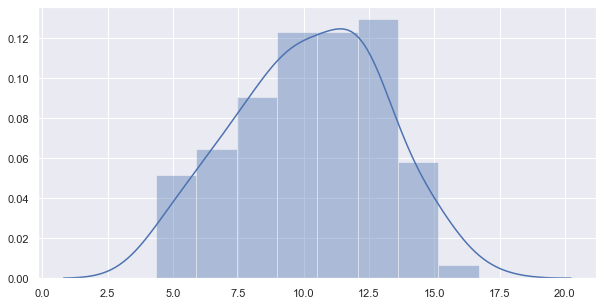

In [30]:
def normhist(x=100):
    #global data
    #dat= data[:x]
    dat=np.random.normal(10,3,x)
    #plt.hist(dat)
    sns.distplot(dat)
    plt.show()
normhist()

### Multiple arguments

We can use multiple arguments the same as single ones.

In [31]:
def l(a=.25, jit=True):
    sns.stripplot('petal_width', 'petal_length', data=iris, jitter=jit, color='red', alpha=a)
    plt.plot()

interact(l, a=(0,1,.05), lag=False);

interactive(children=(FloatSlider(value=0.25, description='a', max=1.0, step=0.05), Checkbox(value=True, descr…

### Specifying widget types

If you don't like `interact()`'s default widget for something, you can specify a different one. There's a list at https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html.

This also allows you to configure things like the labels on buttons and placement.

In [32]:
interact(l, 
         a=widgets.BoundedFloatText(value=.25, min=0, max=1, step=.05, description="Opacity"),
         jit=widgets.ToggleButton(value=True, description="Jitter?"));

interactive(children=(BoundedFloatText(value=0.25, description='Opacity', max=1.0, step=0.05), ToggleButton(va…

If you don't want to be able to change an argument, use the `fixed` widget.

In [33]:
interact(l, a=widgets.fixed(.3), lag=False);

interactive(children=(Checkbox(value=True, description='jit'), Output()), _dom_classes=('widget-interact',))

### `continuous_update`

An alternative to `interact_manual()` is the `continuous_update` option on slider widgets. This graph won't change when you're manipulating the slider, only when you let go.

In [34]:
#Another option for dealing with slow functions.
interact(k, x=widgets.IntSlider(25, min=1, max=iris.count()[0], continuous_update=False));

interactive(children=(IntSlider(value=25, continuous_update=False, description='x', max=150, min=1), Output())…

Here's another, more complex example, showing a line plot.

In [35]:
#Staging.
#from the National Conference of State Legislatures.
unemp = pd.read_html('http://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx')[0].iloc[:,:11]

#Reshape the table into "Long" format.
unemp = pd.melt(unemp, id_vars='State', var_name="Month", value_name="Rate")
unemp.head()

,State,Month,Rate
0,Alabama,Jan.,3.8
1,Alaska,Jan.,6.5
2,Arizona,Jan.,4.9
3,Arkansas,Jan.,3.7
4,California,Jan.,4.2


In [36]:
def plotUnemp(states=[]):
    plt.figure(figsize=(12,8))
    data = unemp[unemp.State.isin(states)]
    sns.lineplot('Month', 'Rate', 'State', data=data)

In [37]:
interact(plotUnemp, states = widgets.SelectMultiple(
                                    options=unemp.State,
                                    value=('Connecticut', 'Maine', 'Massachusetts', 
                                           'New Hampshire', 'Rhode Island', 'Vermont'),
                                    description='State'
))

interactive(children=(SelectMultiple(description='State', index=(6, 19, 21, 29, 39, 45), options=('Alabama', '…

<function __main__.plotUnemp(states=[])>

### Practice

Update your normal histogram plotting function. Add a True/False option to change the type of plot:

* If you're using `plt.hist()`, set the `histtype` argument to `'bar'` if False, `'step'` if True.
* If you're using `sns.distplot()`, set the `kde` option equal to your new argument.

Create an interaction using both the count and type options to update the histogram.

In [40]:
@interact (x=(100,100000))
def plotnorm2 (x=100, type=False):
    data=np.random.normal (10,3,x)
    
    #pyplot
    plt.figure(figsize=(12,9))
    tp='step' if type else 'bar'
    plt.hist(data, histtype=tp)
    plt.show()
    
    #seaborn
    sns.distplot(data, kde=type)
    plt.show()

interactive(children=(IntSlider(value=100, description='x', max=100000, min=100), Checkbox(value=False, descri…

### Placement

This works, but it's not particularly attractive:

In [41]:
def m(x=150, jit=True, species='all'):
    plt.figure(figsize=(12,6))
    dat = iris if species=='all' else iris[iris.species==species]
        
    sns.stripplot('petal_width', 'petal_length', hue='species',
                  data=dat[:x], jitter=jit, alpha=.3)
    plt.show()

In [42]:
interact(m, 
         x=widgets.BoundedIntText(150, min=1, max=iris.count()[0], description='Count', continuous_update=False),
         jit=widgets.ToggleButton(value=True, description="Jitter"), 
         species = widgets.Dropdown(options=np.append(iris.species.unique(), 'all')
                                    , value='all', description='Species')
);

interactive(children=(BoundedIntText(value=150, description='Count', max=150, min=1), ToggleButton(value=True,…

There are a number of [layout widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Container/Layout-widgets) available to help you control the placement of your widgets.

In [43]:
x = widgets.IntSlider(150, min=1, max=iris.count()[0], continuous_update=False)
jit = widgets.ToggleButton(value=True, description="Jitter")
species = widgets.ToggleButtons(options=np.append(iris.species.unique(), 'all'), value='all', 
                        description='Species')

# An HBox lays out its children horizontally
ui = widgets.HBox([x, jit, species])

out = interactive_output(m, {'x': x, 'jit': jit, 'species': species})

display(ui, out)

Output()

Here's the same interaction with the options to the side of the graph instead of above. 

Also note that when we create widgets this way, the visible instances of them are synchronized (when you change the graph below, the one above also changes.

In [44]:
ui = widgets.VBox([x, jit, species])
display(widgets.HBox([ui, out]))

#### Practice

Add arguments to your normal histogram function for mean and standard deviation (the first two arguments to `np.random.normal()`. Create an interaction with controls for all four arguments above or beside the histogram.

In [57]:
def normhist3 (mean=10, sd=3, count=1000, tp=False):
    data=np.random.normal(mean,sd,count)
    #sns.distplot(data, kde=tp)
    plt.hist(data, histtype='bar'if tp else 'step')
    plt.show()

#normhist3(count=10000000, tp=True)
wmean= widgets.IntSlider (min=-1000, max=1000, description= "mean", continuous_update=False)
wsd= widgets.InstSlider (min=-100, max=100, description= "sd", continuous_update=False)
wcount= widgets.InstSlider (min=1000, max=10000000, description= "n", continuous_update=False)
wtype= widgets.ToggleButton(True, description='Type')

ui= widgets.HBox ((wmean, wsd, wcount, wtype))
out= widgets.interactive_output(normhist3, ("mean" : wmean,
                                            "sd": wsd,
                                            "count": wcount,
                                            "tp": wtype))

display (ui, out)

SyntaxError: invalid syntax (<ipython-input-57-56f39364f16f>, line 14)